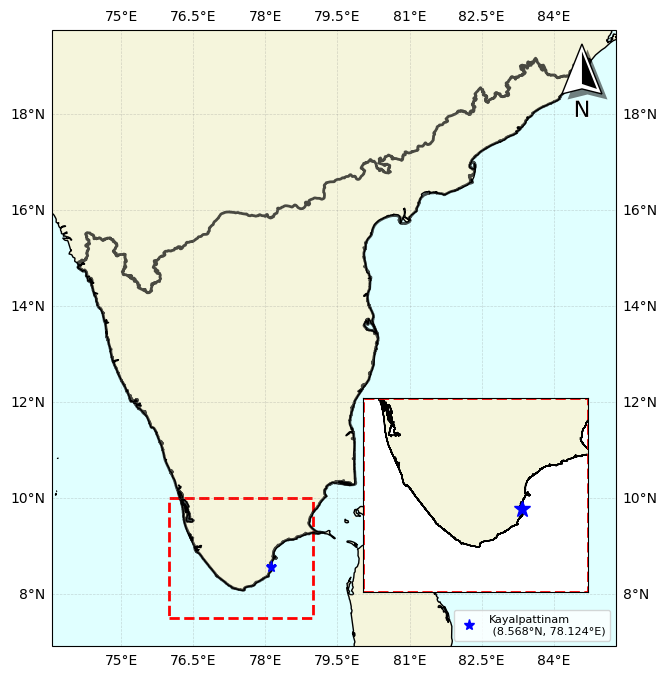

In [11]:
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyArrowPatch
from matplotlib_map_utils.core.north_arrow import north_arrow
# Load shapefile of India (replace with your shapefile path)
india_shapefile = "imd_regions/South_Peninsular.shp"
gdf = gpd.read_file(india_shapefile)

# Create the main plot
fig, ax = plt.subplots(1, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up coastlines, land, and ocean features
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(cfeature.LAND, facecolor='#F5F5DC')
ax.add_feature(cfeature.OCEAN, facecolor='#E0FFFF')

# Plot the full shapefile data
for geom in gdf['geometry']:
    x, y = geom.exterior.xy
    ax.plot(x, y, color='black', linewidth=2, alpha=0.7)

# Define coordinates and size for the square box
lon_min, lon_max = 76, 79
lat_min, lat_max = 7.5, 10
box = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                edgecolor='red', linestyle="--", facecolor='none', linewidth=2, transform=ccrs.PlateCarree())
ax.add_patch(box)

# Add Kayalpattinam location
longitude = 78.1238
latitude = 8.5683
ax.plot(longitude, latitude, 'b*', markersize=8, label='Kayalpattinam\n (8.568°N, 78.124°E)', transform=ccrs.PlateCarree())
# Add a north arrow
# Add a North arrow (Compass)
north_arrow(ax=ax, location="upper right", rotation={"crs":3857, "reference":"center"})
# Add labels and legend
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend(loc='lower right', fontsize=8)
# Add gridlines
gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.3, linestyle='--')
# Filter the data for the inset region
subset_gdf = gdf.cx[lon_min:lon_max, lat_min:lat_max]

# Create the inset plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define inset position and size
ax_inset = inset_axes(ax, width="40%", height="40%", loc="lower right", borderpad=2)

# Plot the filtered data inside the inset
subset_gdf.plot(ax=ax_inset, color='#F5F5DC', edgecolor='black')

# Add the box region in the inset for reference
box_inset = Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                      edgecolor='red', linestyle="--", facecolor='none', linewidth=2)
ax_inset.add_patch(box_inset)

# Add the specific location point in the inset
ax_inset.plot(longitude, latitude, 'b*', markersize=12, label='Kayalpattinam')

# Add a title and remove axis ticks for the inset
ax_inset.set_xlim(lon_min, lon_max)
ax_inset.set_ylim(lat_min, lat_max)
ax_inset.set_xticks([])
ax_inset.set_yticks([])

# Show the plot
plt.show()


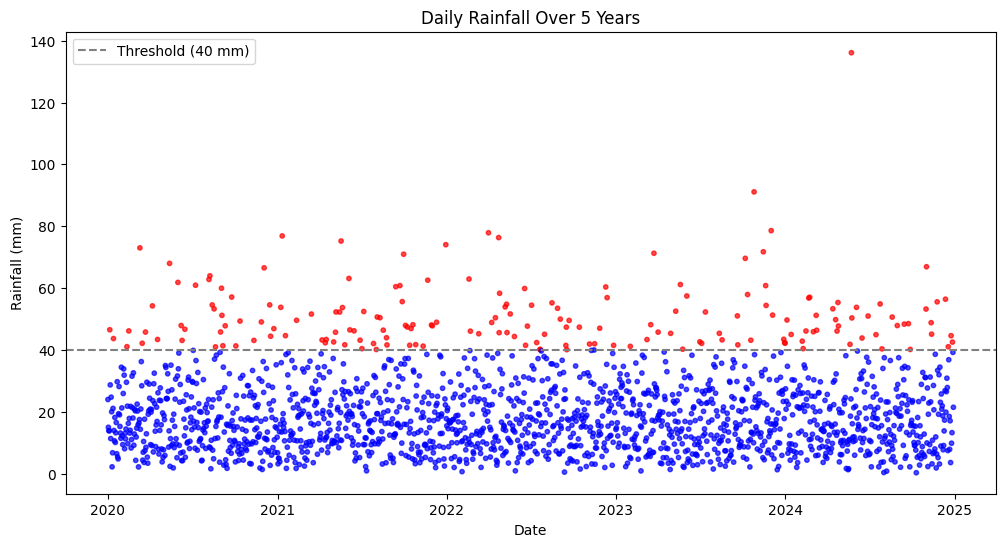

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Generate 5 years of daily data
days = pd.date_range(start="2020-01-01", periods=5*365, freq='D')

# Generate random rainfall data from a skewed distribution (e.g., Gamma)
rainfall = np.random.gamma(shape=2, scale=10, size=len(days))

# Plot
plt.figure(figsize=(12, 6))
colors = ['red' if val > 40 else 'blue' for val in rainfall]
plt.scatter(days, rainfall, c=colors, s=10, alpha=0.7)
plt.axhline(y=40, color='gray', linestyle='--', label="Threshold (40 mm)")

plt.title("Daily Rainfall Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


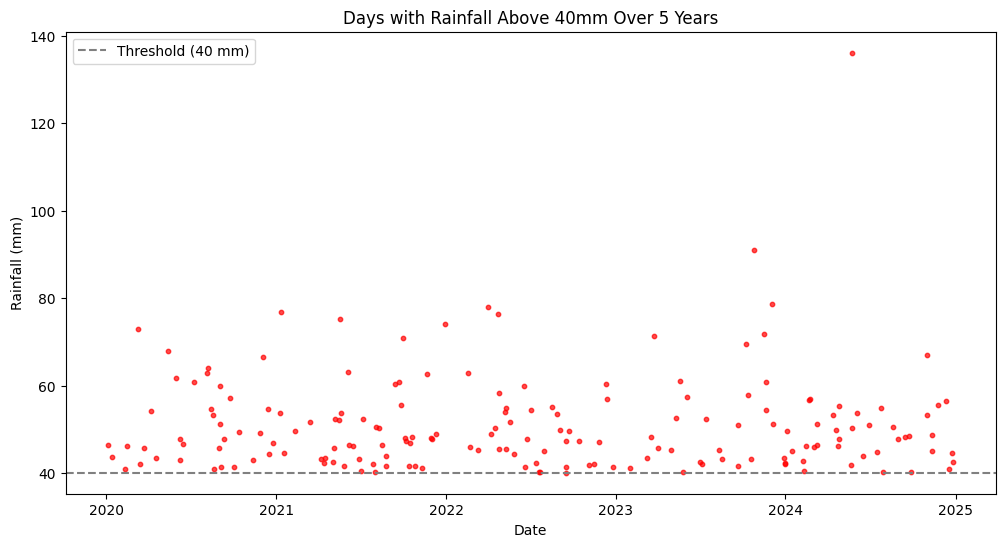

In [3]:
# Filter values above 40mm
high_rainfall_days = days[rainfall > 40]
high_rainfall_values = rainfall[rainfall > 40]

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(high_rainfall_days, high_rainfall_values, c='red', s=10, alpha=0.7)
plt.axhline(y=40, color='gray', linestyle='--', label="Threshold (40 mm)")

plt.title("Days with Rainfall Above 40mm Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


In [ ]:
df=pd.DataFrame([high_rainfall_days,high_rainfall_values],index=['time','value']).T
df['time']=pd.to_datetime(df['time'])

df1=df[df['time'].dt.year==2022]
# Plot
plt.figure(figsize=(20, 6))
plt.scatter(df1['time'], df1['value'], c='red', s=10, alpha=0.7)
plt.axhline(y=40, color='gray', linestyle='--', label="Threshold (40 mm)")

plt.title("Days with Rainfall Above 40mm Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()

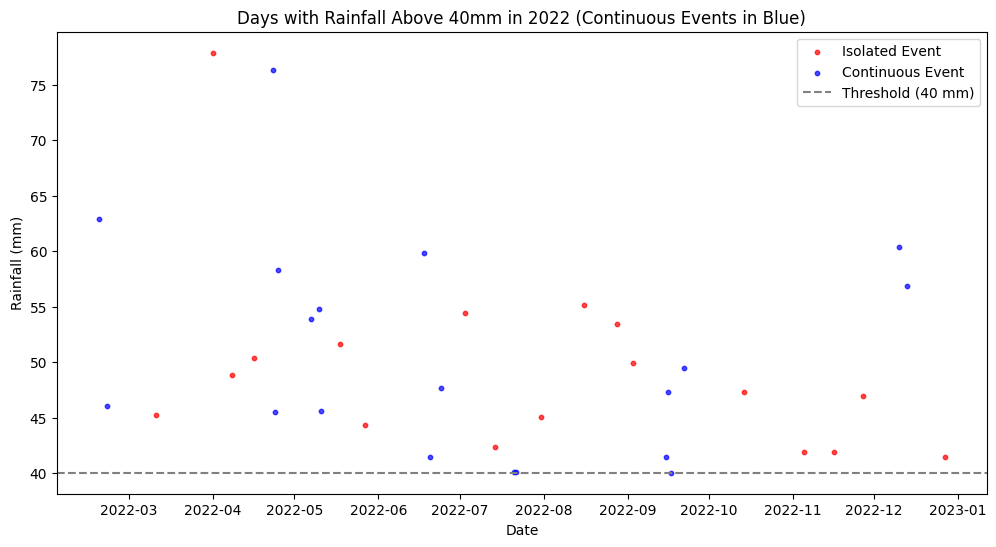

In [27]:
# Recreate DataFrame for high rainfall values
df = pd.DataFrame({'time': high_rainfall_days, 'value': high_rainfall_values})
df['time'] = pd.to_datetime(df['time'])

# Filter for year 2022
df1 = df[df['time'].dt.year == 2022].copy()

# Identify continuous events within 7 days
df1['gap'] = df1['time'].diff().dt.days
df1['group'] = (df1['gap'] > 5).cumsum()

# Assign colors: blue for continuous events, red otherwise
df1['color']= df1['group'].map(lambda x: 'blue' if (df1['group'] == x).sum() > 1 else 'red')

plt.figure(figsize=(12, 6))

# Separate the two categories for the legend
for color, label in zip(['red', 'blue'], ['Isolated Event', 'Continuous Event']):
    subset = df1[df1['color'] == color]
    plt.scatter(subset['time'], subset['value'], c=color, s=10, alpha=0.7, label=label)

plt.axhline(y=40, color='gray', linestyle='--', label="Threshold (40 mm)")

plt.title("Days with Rainfall Above 40mm in 2022 (Continuous Events in Blue)")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()


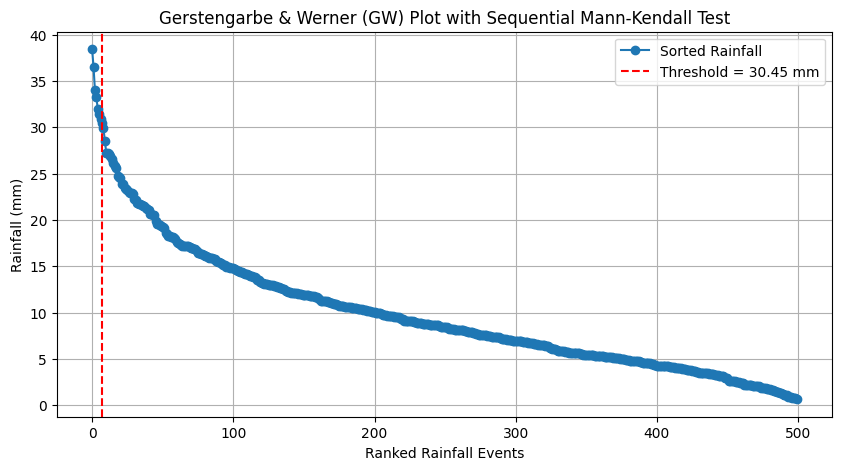

Detected threshold for extreme rainfall: 30.45 mm


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pymannkendall import original_test

# Generate synthetic daily rainfall data (replace with real data)
np.random.seed(42)
rainfall_data = np.random.gamma(shape=2, scale=5, size=500)  # Example gamma-distributed rainfall

# Step 1: Sort data in descending order
sorted_rainfall = np.sort(rainfall_data)[::-1]

# Step 2: Compute first-order differences
differences = np.diff(sorted_rainfall)

# Step 3: Perform Sequential Mann-Kendall Test
mk_results = [original_test(differences[:i]) for i in range(2, len(differences))]

# Extract p-values and trend directions
p_values = np.array([res.p for res in mk_results])
trend_directions = np.array([1 if res.trend == "increasing" else -1 for res in mk_results])

# Step 4: Identify threshold index where trend becomes significant
alpha = 0.05  # Significance level
significant_indices = np.where(p_values < alpha)[0]

if len(significant_indices) > 0:
    threshold_index = significant_indices[0] + 2  # Offset due to indexing in MK test
    threshold_value = sorted_rainfall[threshold_index]
else:
    threshold_index = None
    threshold_value = None

# Step 5: Plot the GW plot
plt.figure(figsize=(10, 5))
plt.plot(sorted_rainfall, marker='o', linestyle='-', label="Sorted Rainfall")
if threshold_index:
    plt.axvline(threshold_index, color='r', linestyle='--', label=f"Threshold = {threshold_value:.2f} mm")
plt.xlabel("Ranked Rainfall Events")
plt.ylabel("Rainfall (mm)")
plt.title("Gerstengarbe & Werner (GW) Plot with Sequential Mann-Kendall Test")
plt.legend()
plt.grid()
plt.show()

if threshold_value:
    print(f"Detected threshold for extreme rainfall: {threshold_value:.2f} mm")
else:
    print("No significant threshold detected.")


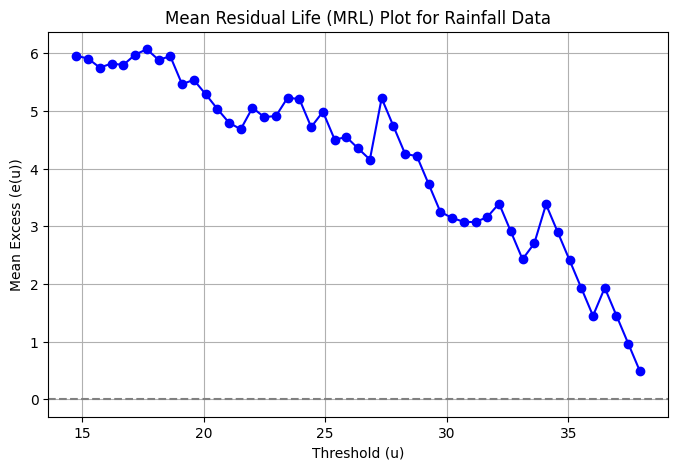

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic daily rainfall data (replace with real data)
np.random.seed(42)
rainfall_data = np.random.gamma(shape=2, scale=5, size=500)  # Example gamma-distributed rainfall

# Step 1: Sort data in ascending order
sorted_rainfall = np.sort(rainfall_data)

# Step 2: Define a range of threshold values
thresholds = np.linspace(np.percentile(sorted_rainfall, 80), np.max(sorted_rainfall), 50)

# Step 3: Compute Mean Residual Life (MRL) for each threshold
mean_excess = []
valid_thresholds = []

for u in thresholds:
    exceedances = sorted_rainfall[sorted_rainfall > u]
    if len(exceedances) > 0:
        mean_excess.append(np.mean(exceedances - u))  # Compute mean excess
        valid_thresholds.append(u)

# Step 4: Plot the Mean Residual Plot
plt.figure(figsize=(8, 5))
plt.plot(valid_thresholds, mean_excess, marker='o', linestyle='-', color='b')
plt.xlabel("Threshold (u)")
plt.ylabel("Mean Excess (e(u))")
plt.title("Mean Residual Life (MRL) Plot for Rainfall Data")
plt.axhline(0, color='gray', linestyle='--')
plt.grid()
plt.show()
